In [40]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import time
import os
import shutil
from scipy.ndimage import gaussian_filter
import scipy.signal
from skimage import color, io

In [41]:
img=cv2.imread("1.jpg")
print(type(img) , img.shape)

<class 'numpy.ndarray'> (308, 401, 3)


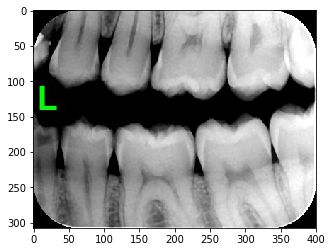

In [42]:
%matplotlib inline
plt.imshow(img)

In [43]:
def grad(x):
    return np.array(np.gradient(x))


def norm(x, axis=0):
    return np.sqrt(np.sum(np.square(x), axis=axis))


def stopping_fun(x):
    return 1. / (1. + norm(grad(x))**2)


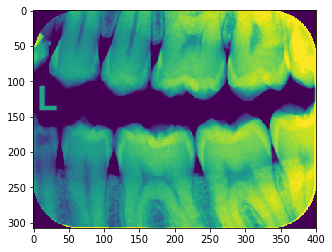

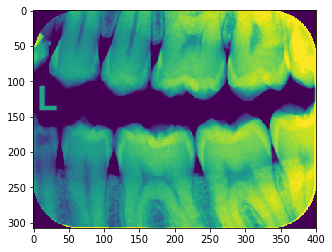

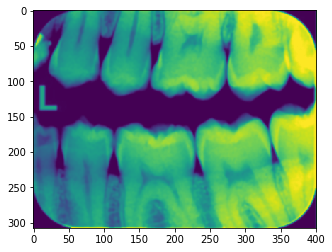

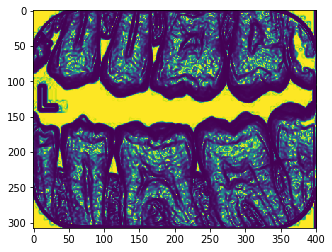

In [62]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(gray_img)
gray_img = gray_img - np.mean(gray_img)
plt.figure()
plt.imshow(gray_img)
img_smooth = gaussian_filter(gray_img, sigma=1)
plt.figure()
plt.imshow(img_smooth)
F = stopping_fun(img_smooth)
plt.figure()
plt.imshow(F)

In [63]:
def default_phi(x):
    phi = np.ones(x.shape[:2])
    phi[5:-5, 5:-5] = -1.
    return phi

In [72]:
phi=default_phi(F)

In [73]:
dt = 1.

for i in range(5):
    dphi = grad(phi)
    dphi_norm = norm(dphi)

    dphi_t = F * dphi_norm

    phi = phi + dt * dphi_t

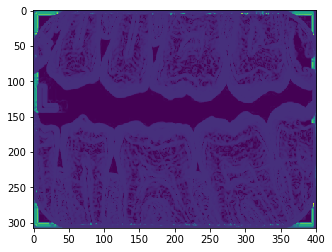

In [74]:
F2=F*phi
plt.figure()
plt.imshow(F2)

In [75]:
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour

C:\Users\Behko\.conda\envs\dental\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  import sys


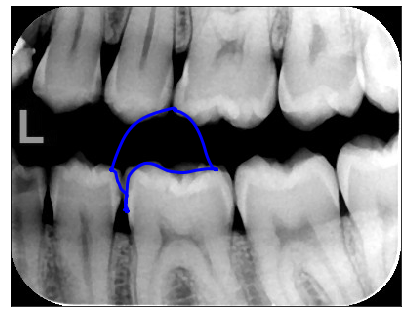

In [85]:
gray_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

s = np.linspace(0, 2*np.pi, 800)
r = 150 + 50*np.sin(s)
c = 150 + 50*np.cos(s)
init = np.array([r, c]).T
snake = active_contour(gaussian(img, 3),
                       init, alpha=0.015, beta=10, gamma=0.001,
                       coordinates='rc')

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(gray_img, cmap=plt.cm.gray)
# ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, gray_img.shape[1], gray_img.shape[0], 0])

plt.show()

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import (morphological_chan_vese,
                                  morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  checkerboard_level_set)

In [88]:
def store_evolution_in(lst):
    """Returns a callback function to store the evolution of the level sets in
    the given list.
    """

    def _store(x):
        lst.append(np.copy(x))

    return _store


501


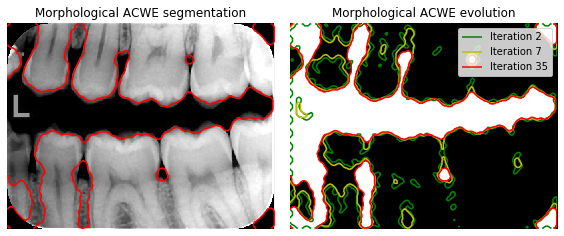

In [104]:
gray_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

init_ls = checkerboard_level_set(gray_img.shape, 10)
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_chan_vese(gray_img, 35, init_level_set=init_ls, smoothing=5,
                             iter_callback=callback)

fig, axes = plt.subplots(1, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(gray_img, cmap="gray")
ax[0].set_axis_off()
ax[0].contour(ls, [0.5], colors='r')
ax[0].set_title("Morphological ACWE segmentation", fontsize=12)

ax[1].imshow(ls, cmap="gray")
ax[1].set_axis_off()
print(len(evolution))
contour = ax[1].contour(evolution[2], [0.5], colors='g')
contour.collections[0].set_label("Iteration 2")
contour = ax[1].contour(evolution[7], [0.5], colors='y')
contour.collections[0].set_label("Iteration 7")
contour = ax[1].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 35")
ax[1].legend(loc="upper right")
title = "Morphological ACWE evolution"
ax[1].set_title(title, fontsize=12)

# image=gray_img
# gimage = inverse_gaussian_gradient(image)
# # Initial level set
# init_ls = np.zeros(image.shape, dtype=np.int8)
# init_ls[10:-10, 10:-10] = 1
# # List with intermediate results for plotting the evolution
# evolution = []
# callback = store_evolution_in(evolution)
# ls = morphological_geodesic_active_contour(gimage, 230, init_ls,
#                                            smoothing=1, balloon=-1,
#                                            threshold=0.69,
                    
#                                            iter_callback=callback)

# gimage = inverse_gaussian_gradient(image)
# ax[2].imshow(image, cmap="gray")
# ax[2].set_axis_off()
# ax[2].contour(ls, [0.5], colors='r')
# ax[2].set_title("Morphological GAC segmentation", fontsize=12)

# ax[3].imshow(ls, cmap="gray")
# ax[3].set_axis_off()
# contour = ax[3].contour(evolution[0], [0.5], colors='g')
# contour.collections[0].set_label("Iteration 0")
# contour = ax[3].contour(evolution[100], [0.5], colors='y')
# contour.collections[0].set_label("Iteration 100")
# contour = ax[3].contour(evolution[-1], [0.5], colors='r')
# contour.collections[0].set_label("Iteration 230")
# ax[3].legend(loc="upper right")
# title = "Morphological GAC evolution"
# ax[3].set_title(title, fontsize=12)



fig.tight_layout()
plt.show()

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import data
from skimage.metrics import (adapted_rand_error,
                              variation_of_information)
from skimage.filters import sobel
from skimage.measure import label
from skimage.util import img_as_float
from skimage.feature import canny
from skimage.morphology import remove_small_objects
from skimage.segmentation import (morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  watershed,
                                  mark_boundaries)

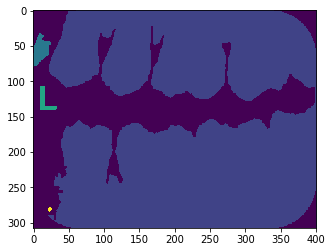

In [135]:
gray_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

elevation_map = sobel(gray_img)
markers = np.zeros_like(gray_img)
markers[image < 35] = 1
markers[image > 150] = 2
im_true = watershed(elevation_map, markers)
im_true = ndi.label(ndi.binary_fill_holes(im_true - 1))[0]
plt.figure()
plt.imshow(im_true)

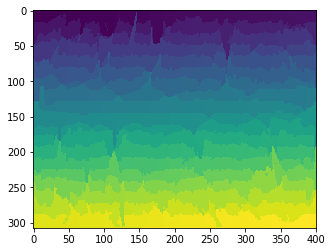

In [136]:
edges = sobel(gray_img)
im_test1 = watershed(edges, markers=468, compactness=0.001)
plt.figure()
plt.imshow(im_test1)

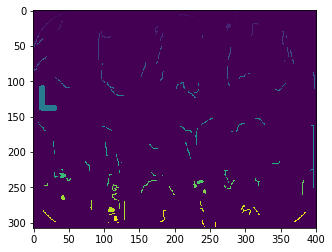

In [137]:
edges = canny(gray_img)
fill_coins = ndi.binary_fill_holes(edges)
im_test2 = ndi.label(remove_small_objects(fill_coins, 21))[0]
plt.figure()
plt.imshow(im_test2)


## Method: Compact watershed
Adapted Rand error: 0.9920788731804758
Adapted Rand precision: 0.003976313073320316
Adapted Rand recall: 0.9999223161647349
False Splits: 7.754996417297916
False Merges: 0.08346614580497935

## Method: Canny filter
Adapted Rand error: 0.029972905245425174
Adapted Rand precision: 0.9554948853076547
Adapted Rand recall: 0.9850081745272303
False Splits: 0.2792716188519105
False Merges: 0.8613385550643019

## Method: Morphological Geodesic Active Contours
Adapted Rand error: 0.1642332959252718
Adapted Rand precision: 0.7283145241907001
Adapted Rand recall: 0.9804122201876531
False Splits: 0.645414457764561
False Merges: 0.8983146105722173


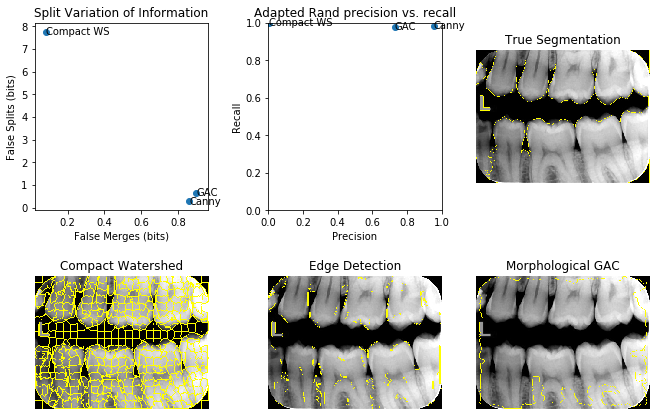

In [138]:
gray_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

image = gray_img
gradient = inverse_gaussian_gradient(image)
init_ls = np.zeros(image.shape, dtype=np.int8)
init_ls[10:-10, 10:-10] = 1
im_test3 = morphological_geodesic_active_contour(gradient, iterations=100,
                                                 init_level_set=init_ls,
                                                 smoothing=1, balloon=-1,
                                                 threshold=0.69)
im_test3 = label(im_test3)

method_names = ['Compact watershed', 'Canny filter',
                'Morphological Geodesic Active Contours']
short_method_names = ['Compact WS', 'Canny', 'GAC']

precision_list = []
recall_list = []
split_list = []
merge_list = []
for name, im_test in zip(method_names, [im_test1, im_test2, im_test3]):
    error, precision, recall = adapted_rand_error(im_true, im_test)
    splits, merges = variation_of_information(im_true, im_test)
    split_list.append(splits)
    merge_list.append(merges)
    precision_list.append(precision)
    recall_list.append(recall)
    print(f"\n## Method: {name}")
    print(f"Adapted Rand error: {error}")
    print(f"Adapted Rand precision: {precision}")
    print(f"Adapted Rand recall: {recall}")
    print(f"False Splits: {splits}")
    print(f"False Merges: {merges}")

fig, axes = plt.subplots(2, 3, figsize=(9, 6), constrained_layout=True)
ax = axes.ravel()

ax[0].scatter(merge_list, split_list)
for i, txt in enumerate(short_method_names):
    ax[0].annotate(txt, (merge_list[i], split_list[i]),
                   verticalalignment='center')
ax[0].set_xlabel('False Merges (bits)')
ax[0].set_ylabel('False Splits (bits)')
ax[0].set_title('Split Variation of Information')

ax[1].scatter(precision_list, recall_list)
for i, txt in enumerate(short_method_names):
    ax[1].annotate(txt, (precision_list[i], recall_list[i]),
                   verticalalignment='center')
ax[1].set_xlabel('Precision')
ax[1].set_ylabel('Recall')
ax[1].set_title('Adapted Rand precision vs. recall')
ax[1].set_xlim(0, 1)
ax[1].set_ylim(0, 1)

ax[2].imshow(mark_boundaries(image, im_true))
ax[2].set_title('True Segmentation')
ax[2].set_axis_off()

ax[3].imshow(mark_boundaries(image, im_test1))
ax[3].set_title('Compact Watershed')
ax[3].set_axis_off()

ax[4].imshow(mark_boundaries(image, im_test2))
ax[4].set_title('Edge Detection')
ax[4].set_axis_off()

ax[5].imshow(mark_boundaries(image, im_test3))
ax[5].set_title('Morphological GAC')
ax[5].set_axis_off()

plt.show()